In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="muted", color_codes=True)

In [2]:
data_folder = '../mt_wdgrl_2020-09-15_19-52-29'

### Domain Discriminator

Text(0.5, 0, 'Epoch')

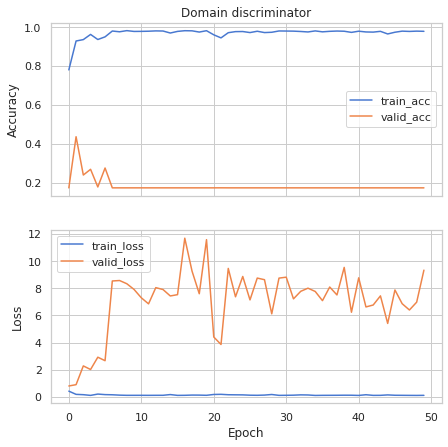

In [3]:
df = pd.read_csv(os.path.join(data_folder, 'disc'), index_col=0)

# prepare subplot
f, axes = plt.subplots(2, 1, figsize=(7, 7), sharex=True)
sns.lineplot(data=df[['train_acc', 'valid_acc']], ax=axes[0], dashes=False)
axes[0].set_title('Domain discriminator')
axes[0].set_ylabel('Accuracy')
sns.lineplot(data=df[['train_loss', 'valid_loss']], ax=axes[1], dashes=False)
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')

## WDGRL Micorarray -> TCGA

In [7]:
def plot_st_loss_acc(df, figsize=(7, 7)):
    """Plot source and target losses and accuracies."""
    f, axes = plt.subplots(2, 1, figsize=figsize, sharex=True)
    axes[0].plot(df['sc_acc'], label='source')
    axes[0].plot(df['tc_acc'], label='target')
    axes[0].set_title('Source vs Target')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()

    axes[1].plot(df['sc_loss'], label='source')
    axes[1].plot(df['tc_loss'], label='target')
    axes[1].set_ylabel('Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].legend()
    plt.plot()

    
def plot_wasserstein(df, figsize=(7, 7), gr_ylim=None, wd_ylim=None):
    """Plot Wassestein distance and gradient penalization."""
    f, axes = plt.subplots(2, 1, figsize=figsize, sharex=True)
    # gradient
    axes[0].plot(df['wd_grad'])
    axes[0].set_ylim(gr_ylim)
    axes[0].set_ylabel('Gradient')
    axes[0].set_title('Wasserstein')

    # wassestein loss
    axes[1].plot(-df['ewd_loss'], label='estimated')
    axes[1].plot(df['wd_loss'], label='computed')
    axes[1].set_ylim(wd_ylim)
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].legend()
    plt.plot()

    
def plot_valid_wassestein(df, figsize=(7,7), wd_ylim=None):
    f = plt.figure(figsize=figsize)
    # wassestein loss
    plt.plot(df['wd_loss'])
    plt.ylim(wd_ylim)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Wasserstein')
    plt.plot()

    
def plot_losses(df, figsize=(7, 7)):
    """Plot total loss, l2 loss and source classification loss."""
    f, axes = plt.subplots(2, 1, figsize=figsize, sharex=True)
    axes[0].plot(df['l2_loss'])
    axes[0].set_ylabel('L2 norm')
    axes[0].set_title('Losses')

    axes[1].plot(df['total_loss'], label='total')
    axes[1].plot(df['sc_loss'], label='source classif')
    axes[1].set_ylabel('Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].legend()
    plt.plot()

### Training

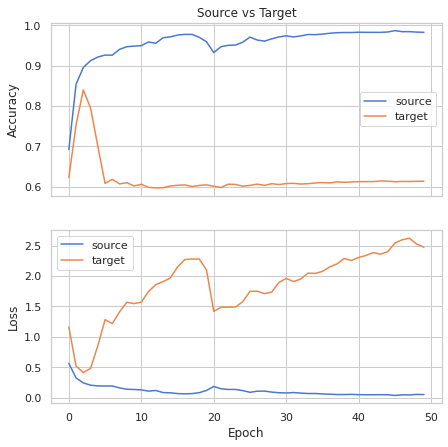

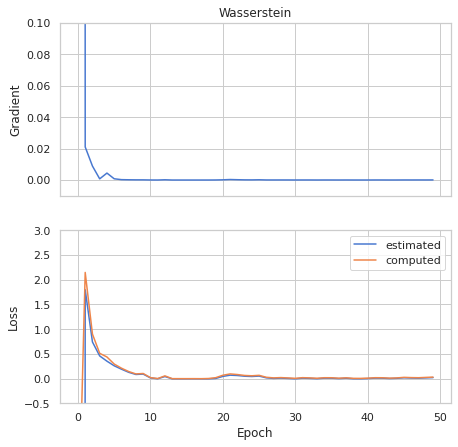

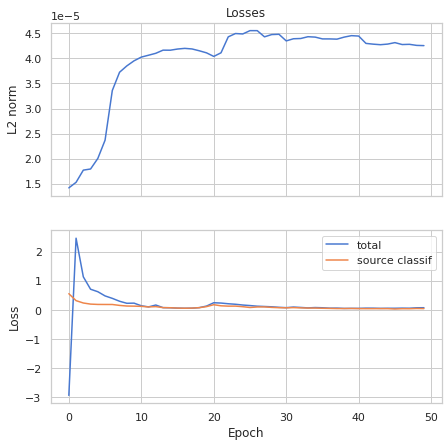

In [8]:
df = pd.read_csv(os.path.join(data_folder, 'train'), index_col=0)
plot_st_loss_acc(df)
plot_wasserstein(df, gr_ylim=(-0.01, 0.1), wd_ylim=(-0.5, 3))
plot_losses(df)

### Validation

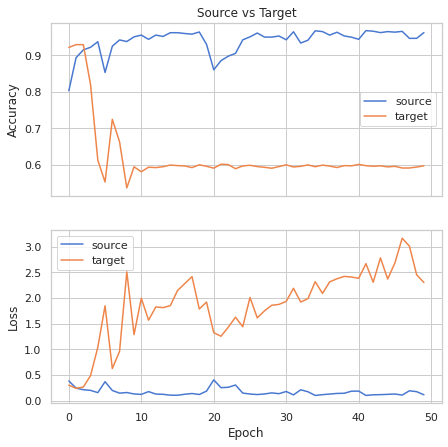

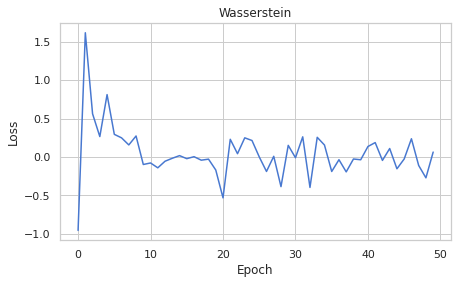

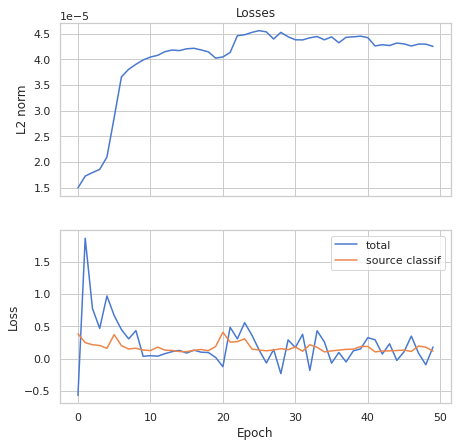

In [6]:
df = pd.read_csv(os.path.join(data_folder, 'valid'), index_col=0)
plot_st_loss_acc(df)
plot_valid_wassestein(df, figsize=(7, 4))
plot_losses(df)